# IS 670 Assignment 4

## Introduction

The broad and multifaceted area of data science is always developing, offering cutting-edge techniques for deriving significant insights from a variety of datasets. Applying three separate but related data science methodologies to various datasets—each with its own set of criteria and challenges—is the task at hand. These methods include ensemble modeling for classification, association rule mining with the Apriori algorithm, and K-means clustering. With the use of these techniques, hoping to reveal latent patterns, forecast results, and extract knowledge that is essential for making decisions in practical situations.

##Objectives

Dataset 1: K-means clustering Using measurements of the sepals and petals, the K-means clustering technique will be applied to the Iris dataset in order to find naturally occurring groups among the iris flowers. Using the elbow approach, ascertain the ideal number of clusters, and maybe name these clusters according to recognized iris species.<br>

Dataset 2: Association Rule Mining Using Apriori Using an Online Retail Transactions dataset, apply the Apriori method to identify frequently occurring item groupings and determine association rules. to analyze the top five association rules, establish suitable thresholds for the support and confidence criteria, and provide insights that may be used to one's benefit in the workplace.<br>

Dataset 3: Group models for categorization employing methods like voting, bagging, or boosting to create an ensemble model that predicts passenger characteristics-based survival on the Titanic. to compare the ensemble model's performance with other common machine learning models, such as logistic regression and decision trees, in order to assess its performance.


##Definitions

K-means Clustering: A method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.<br>

Elbow Method: A heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.<br>

Apriori Algorithm: An algorithm for frequent item set mining and association rule learning over transactional databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.<br>

Ensemble Modeling: A machine learning paradigm where multiple models (often called "weak learners") are trained to solve the same problem and combined to get better results. The main principle behind ensemble modeling is that a group of “weak learners” can come together to form a “strong learner.”<br>

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Iris Dataset

In [3]:
# Read data
ir = pd.read_csv("/content/drive/MyDrive/IS670_data/Iris.csv")
ir

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,7.9,3.8,6.4,2.0
1,7.7,3.8,6.7,2.2
2,7.7,3.0,6.1,2.3
3,7.7,2.8,6.7,2.0
4,7.7,2.6,6.9,2.3
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,4.4,3.2,1.3,0.2
147,4.4,3.0,1.3,0.2
148,4.4,2.9,1.4,0.2


In [4]:
# Show the head rows of a data frame
ir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,7.9,3.8,6.4,2.0
1,7.7,3.8,6.7,2.2
2,7.7,3.0,6.1,2.3
3,7.7,2.8,6.7,2.0
4,7.7,2.6,6.9,2.3


In [5]:
ir.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [6]:
# Examine variable type
ir.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [7]:
# Change categorical variables to "category"

In [8]:
# Create dummy variables
ir = pd.get_dummies(ir, columns=[], drop_first=True)
ir

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,7.9,3.8,6.4,2.0
1,7.7,3.8,6.7,2.2
2,7.7,3.0,6.1,2.3
3,7.7,2.8,6.7,2.0
4,7.7,2.6,6.9,2.3
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,4.4,3.2,1.3,0.2
147,4.4,3.0,1.3,0.2
148,4.4,2.9,1.4,0.2


###Visualizations

<Figure size 1000x600 with 0 Axes>

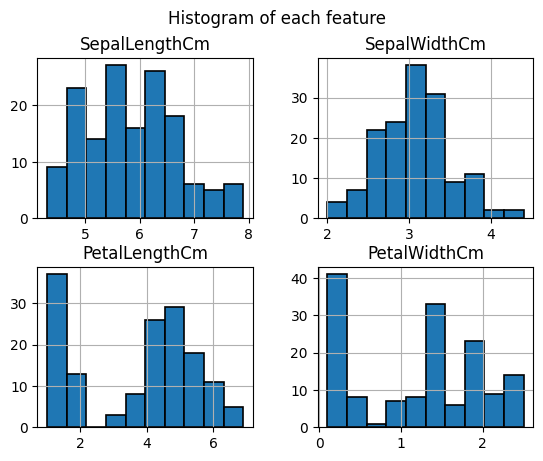

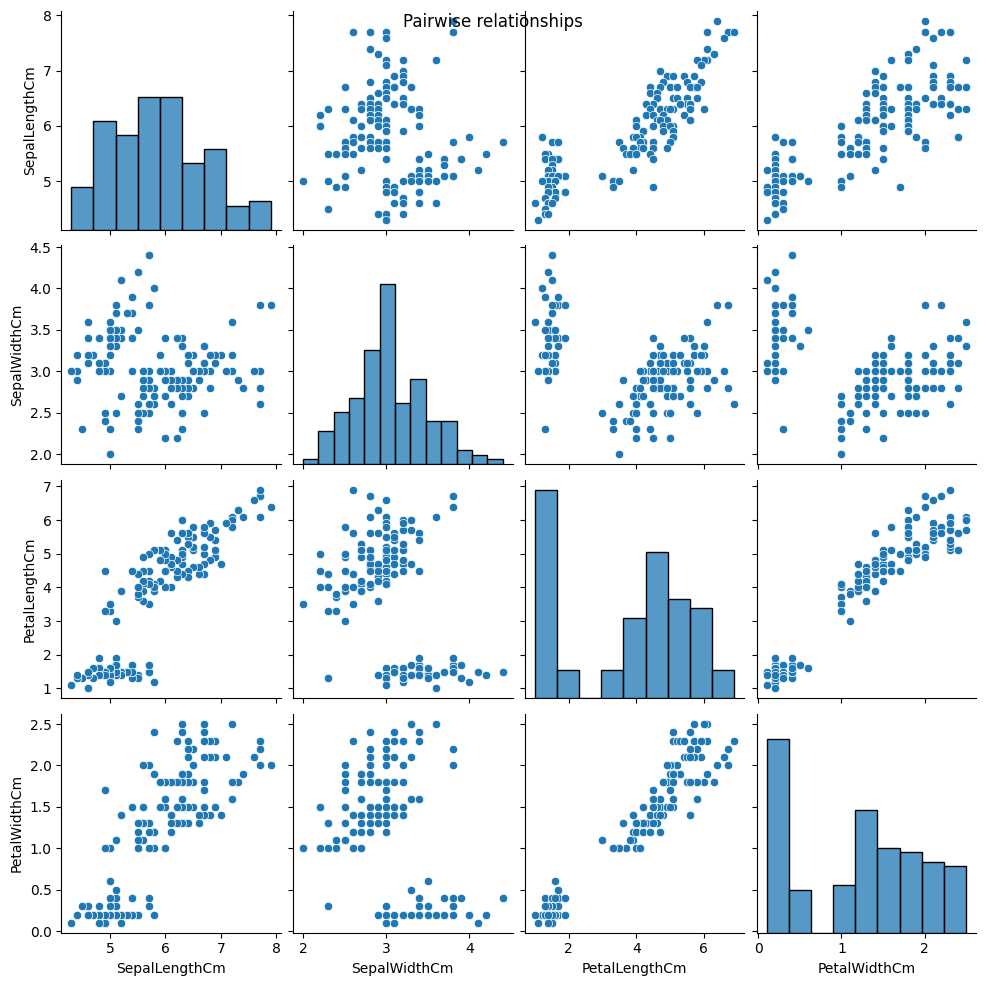

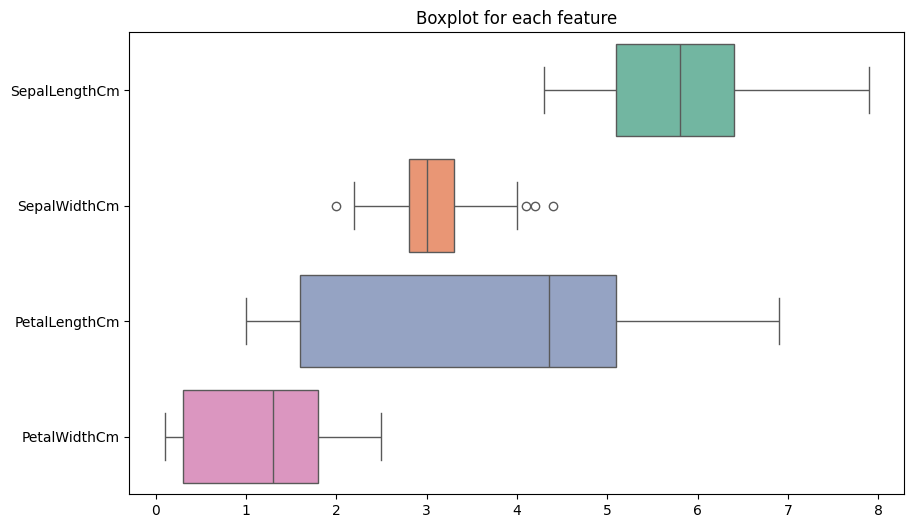

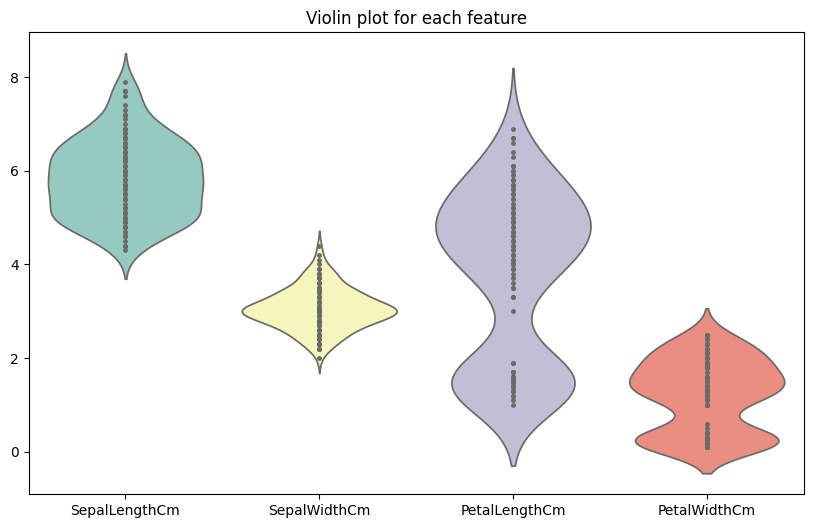

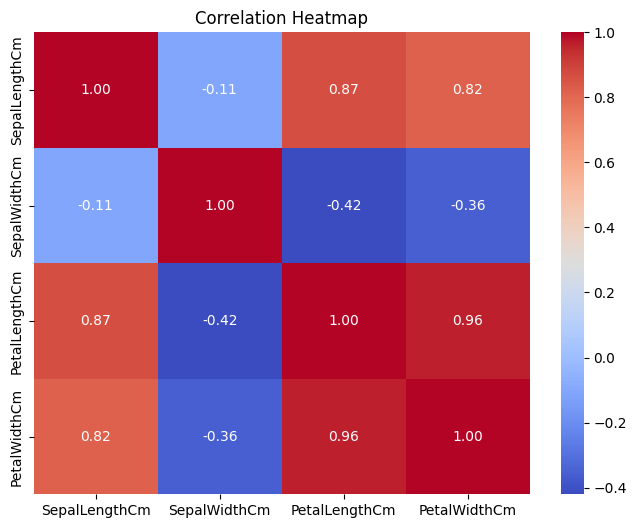

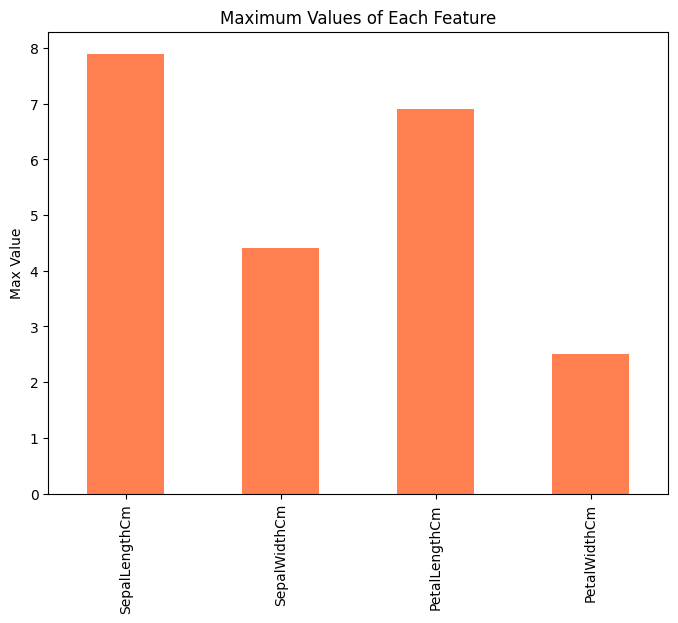

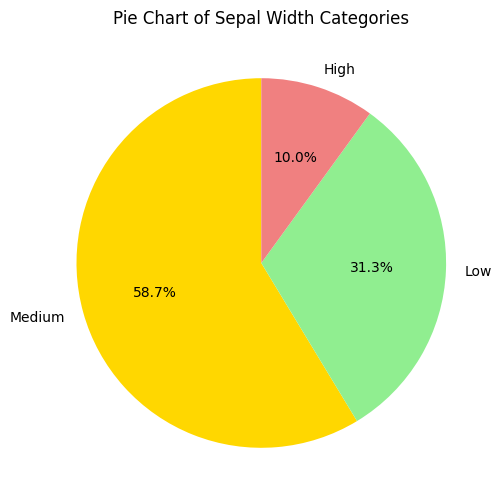

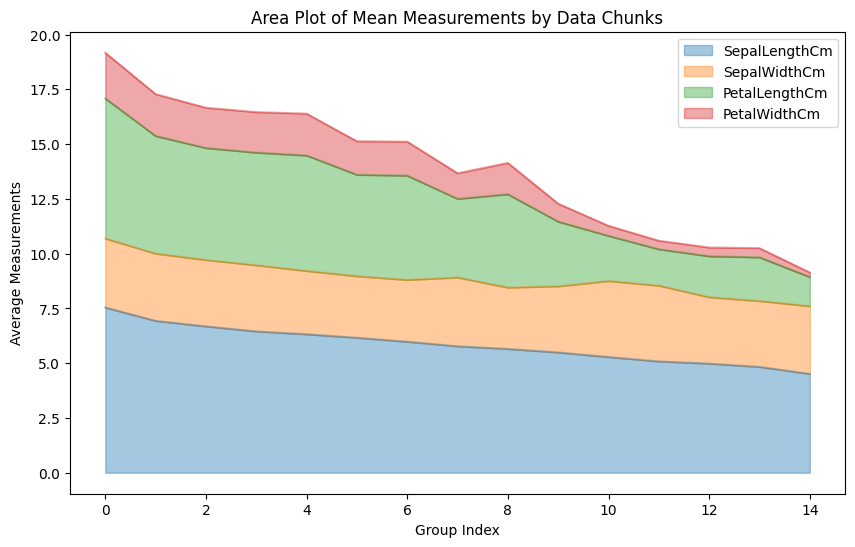

In [9]:
#Histogram for each feature
plt.figure(figsize=(10, 6))
ir.hist(edgecolor='black', linewidth=1.2)
plt.suptitle('Histogram of each feature')
plt.show()

#Pairplot to visualize pairwise relationships between features
sns.pairplot(ir)
plt.suptitle('Pairwise relationships')
plt.show()

#Boxplot for each feature to visualize distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=ir, orient="h", palette="Set2")
plt.title('Boxplot for each feature')
plt.show()

#Violin plot for each feature to visualize distributions
plt.figure(figsize=(10, 6))
sns.violinplot(data=ir, palette="Set3", inner="point")
plt.title('Violin plot for each feature')
plt.show()

#Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ir.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Simple Bar Chart - Comparing max values of each feature
plt.figure(figsize=(8, 6))
ir.max().plot(kind='bar', color='coral', title='Maximum Values of Each Feature')
plt.ylabel('Max Value')
plt.show()

#Pie Chart - Distribution of data by sepal width categories
sepal_width_bins = pd.cut(ir['SepalWidthCm'], bins=3, labels=['Low', 'Medium', 'High'])
sepal_width_counts = sepal_width_bins.value_counts()

plt.figure(figsize=(8, 6))
sepal_width_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen', 'lightcoral'])
plt.title('Pie Chart of Sepal Width Categories')
plt.ylabel('')
plt.show()

#Area Plot - Trends of average Sepal and Petal Measurements
ir.groupby(ir.index // 10).mean().plot.area(figsize=(10, 6), alpha=0.4)
plt.title('Area Plot of Mean Measurements by Data Chunks')
plt.xlabel('Group Index')
plt.ylabel('Average Measurements')
plt.show()


In [10]:
# Apply minmax normalization
min_max_scaler = preprocessing.MinMaxScaler()
ir_normalized = pd.DataFrame(min_max_scaler.fit_transform(ir))
ir_normalized.columns = ir.columns
ir_normalized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.000000,0.750000,0.915254,0.791667
1,0.944444,0.750000,0.966102,0.875000
2,0.944444,0.416667,0.864407,0.916667
3,0.944444,0.333333,0.966102,0.791667
4,0.944444,0.250000,1.000000,0.916667
...,...,...,...,...
145,0.055556,0.125000,0.050847,0.083333
146,0.027778,0.500000,0.050847,0.041667
147,0.027778,0.416667,0.050847,0.041667
148,0.027778,0.375000,0.067797,0.041667


In [11]:
# Build a clustering model with n_clusters = 2. Set random_state=0.
model1 = KMeans(n_clusters=2, random_state=0)
model1.fit(ir_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [12]:
# Generate the cluster labels
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
# Show cluster size
Counter(model1.labels_)

Counter({0: 100, 1: 50})

In [14]:
# Show cluster centroids
pd.DataFrame({'Iris versicolor':ir[model1.labels_==0].mean(axis=0), 'Iris setosa':ir[model1.labels_==1].mean(axis=0)})

,Iris versicolor,Iris setosa
SepalLengthCm,6.262,5.006
SepalWidthCm,2.872,3.418
PetalLengthCm,4.906,1.464
PetalWidthCm,1.676,0.244


**Species Assumption:**

The "Iris versicolor" cluster's measurements:
Larger sepal length and narrower sepal width align well with the characteristics of Iris versicolor.
Larger petal length and width also match the typical profile of Iris versicolor.

The "Iris setosa" cluster's measurements:
Shorter sepal length and broader sepal width are characteristic of Iris setosa.
Significantly shorter petal length and width are also indicative of Iris setosa.

In [15]:
# Build a clustering model with n_clusters = 3
model2 = KMeans(n_clusters=3, random_state=0)
model2.fit(ir_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [16]:
# Generate the cluster labels
model2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
# Show cluster size
Counter(model2.labels_)

Counter({2: 39, 0: 61, 1: 50})

In [18]:
# Show cluster centroids
pd.DataFrame({'Iris versicolor':ir[model2.labels_==0].mean(axis=0), 'Iris setosa':ir[model2.labels_==1].mean(axis=0), 'Iris virginica':ir[model2.labels_==2].mean(axis=0)})

,Iris versicolor,Iris setosa,Iris virginica
SepalLengthCm,5.888525,5.006,6.846154
SepalWidthCm,2.737705,3.418,3.082051
PetalLengthCm,4.396721,1.464,5.702564
PetalWidthCm,1.418033,0.244,2.079487


**Species Assumption:**

The "Iris versicolor" cluster's measurements of both sepals and petals fall squarely within the ranges typical for Iris versicolor, making this label appropriate.

The "Iris setosa" cluster's notably shorter and broader sepals, coupled with very short and narrow petals, are key identifiers for Iris setosa.

The "Iris virginica" cluster exhibits the largest measurements for both sepals and petals, aligning perfectly with the known botanical features of Iris virginica. This supports the accuracy of the label.



##Elbow test to determine optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Test')

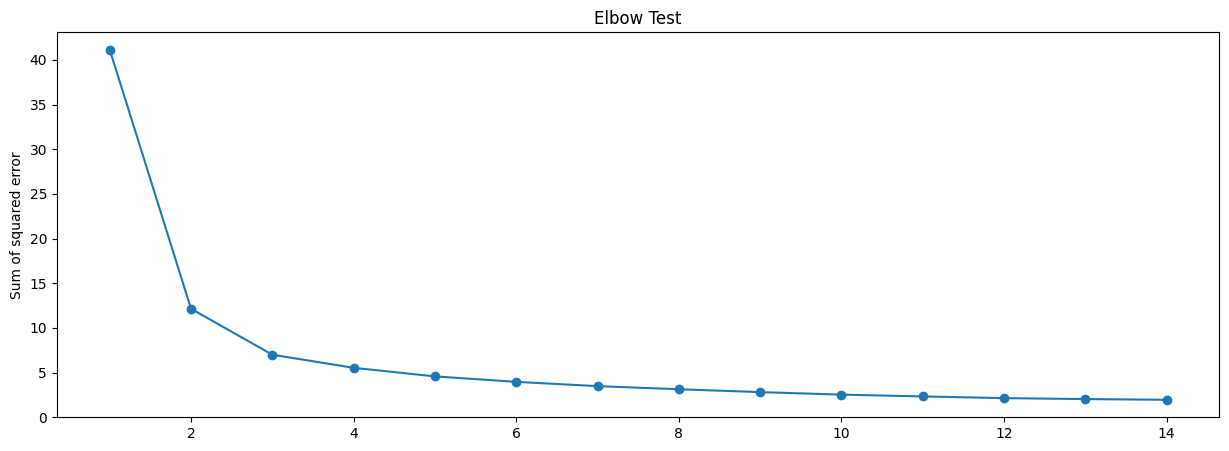

In [19]:
Sum_of_squared_error = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ir_normalized)
    Sum_of_squared_error.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.scatter(range(1, 15), Sum_of_squared_error)
plt.plot(range(1, 15), Sum_of_squared_error)
plt.ylabel('Sum of squared error')
plt.title('Elbow Test')

##Discussions

Based on the Elbow Test graph, 3 clusters are optimal because it's at this point that the SSE reduction begins to level off, indicating that additional clusters would not capture enough new variance in the data to justify their inclusion. This makes 3 clusters the best choice for effectively balancing error reduction with model simplicity and interpretability.

In [20]:
# Build a clustering model with n_clusters = 4
model3 = KMeans(n_clusters=4, random_state=0)
model3.fit(ir_normalized)

# Generate the cluster labels
model3.labels_

# Show cluster size
Counter(model3.labels_)

# Show cluster centroids
pd.DataFrame({'Iris versicolor1':ir[model3.labels_==0].mean(axis=0), 'Iris setosa':ir[model3.labels_==1].mean(axis=0), 'Iris versicolor2':ir[model3.labels_==2].mean(axis=0), 'Iris virginica':ir[model3.labels_==3].mean(axis=0)})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Iris versicolor1,Iris setosa,Iris versicolor2,Iris virginica
SepalLengthCm,6.250000,5.006,5.582759,6.958621
SepalWidthCm,2.900000,3.418,2.568966,3.134483
PetalLengthCm,4.873810,1.464,4.003448,5.855172
PetalWidthCm,1.640476,0.244,1.231034,2.172414


**Species Assumption:**<br>

The 'Iris versicolor1' cluster's measurements of both sepals and petals are intermediate, which are typical characteristics of Iris versicolor, making this label appropriate.

The 'Iris setosa' cluster is characterized by notably shorter and broader sepals, along with very short and narrow petals, which are key identifiers for Iris setosa.

The 'Iris versicolor2' cluster, though presenting slightly smaller sepal and petal measurements than the first Iris versicolor cluster, still falls within the typical range for Iris versicolor, validating this label.

The 'Iris virginica' cluster exhibits the largest measurements for both sepals and petals, aligning perfectly with the known botanical features of Iris virginica, which supports the accuracy of the label.



#Online Retail Transactions Dataset

In [21]:
# Import libraries
! pip install apyori
import pandas as pd
import numpy as np
from csv import reader
import seaborn as sns
from apyori import apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=3d79b52f67b5269ec298f80a68c9184645a61e710dec82c872b8432d76cff87b
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [22]:
# Read data line by line
ort = []
with open('/content/drive/MyDrive/IS670_data/OnlineRetailTransactions.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        ort.append(row)

In [23]:
# Inspect the first 5 transactions
ort[:5]

[['white hanging heart t-light holder',
  ' white metal lantern',
  ' cream cupid hearts coat hanger',
  ' knitted union flag hot water bottle',
  ' red woolly hottie white heart.',
  ' set 7 babushka nesting boxes',
  ' glass star frosted t-light holder'],
 ['hand warmer union jack', ' hand warmer red polka dot'],
 ['assorted colour bird ornament',
  " poppy's playhouse bedroom ",
  " poppy's playhouse kitchen",
  ' feltcraft princess charlotte doll',
  ' ivory knitted mug cosy ',
  ' box of 6 assorted colour teaspoons',
  ' box of vintage jigsaw blocks ',
  ' box of vintage alphabet blocks',
  ' home building block word',
  ' love building block word',
  ' recipe box with metal heart',
  ' doormat new england'],
 ['jam making set with jars',
  ' red coat rack paris fashion',
  ' yellow coat rack paris fashion',
  ' blue coat rack paris fashion'],
 ['bath building block word']]

In [24]:
# Show the number of transactions
len(ort)

25900

In [25]:
# Show the number of unique items
flat_list = np.concatenate(ort).flat
unique_item, item_count = np.unique(flat_list, return_counts=True)
print("number of unique items:", len(unique_item))

number of unique items: 7061


<Axes: xlabel='transaction_len', ylabel='count'>

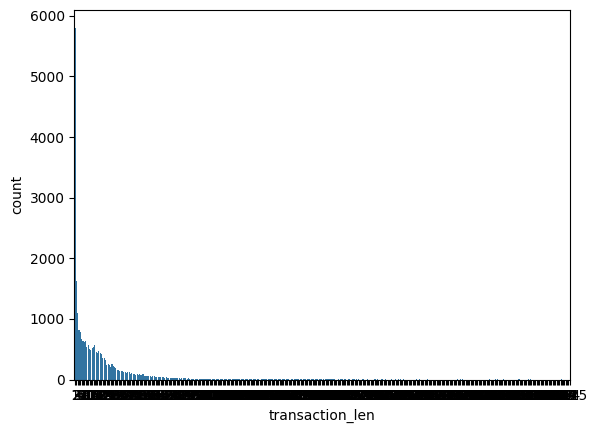

In [26]:
# Plot the distribution of transaction length
transaction_len = []
for transaction in ort:
  transaction_len.append(len(transaction))
sns.countplot(x = 'transaction_len', data = pd.DataFrame({'transaction_len':transaction_len}))

In [27]:
# Examine the absolute frquency of items in descending order
item_frequency = pd.DataFrame({'items':flat_list})
item_frequency.value_counts()

items                              
 white hanging heart t-light holder    2163
 jumbo bag red retrospot               2056
 regency cakestand 3 tier              1911
 party bunting                         1598
 lunch bag red retrospot               1557
                                       ... 
set 12 colour pencils doiley              1
glass chalice green  small                1
glass cake cover and plate                1
glass bonne jam jar                       1
michel oops                               1
Name: count, Length: 7061, dtype: int64

In [28]:
# Examine the relative frquency of items in descending order
item_frequency.value_counts()/len(ort)

items                              
 white hanging heart t-light holder    0.083514
 jumbo bag red retrospot               0.079382
 regency cakestand 3 tier              0.073784
 party bunting                         0.061699
 lunch bag red retrospot               0.060116
                                         ...   
set 12 colour pencils doiley           0.000039
glass chalice green  small             0.000039
glass cake cover and plate             0.000039
glass bonne jam jar                    0.000039
michel oops                            0.000039
Name: count, Length: 7061, dtype: float64

In [29]:
# Use the apriori command to generate rules with minimal support = 0.01, minimal confidence = 0.3, and max length = 2.
ort_rules = apriori(ort, min_support = 0.01, min_confidence = 0.3, max_length=2)
ort_rules = list(ort_rules)
#ort_rules

In [30]:
# Display all rules
all_rules = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(ort_rules)):
   for rule_ in ort_rules[i].ordered_statistics:
       all_rules = all_rules._append({'LHS':','.join(list(rule_.items_base)),'RHS':','.join(list(rule_.items_add)), 'support': ort_rules[i].support, 'confidence': rule_.confidence, 'lift': rule_.lift}, ignore_index=True)
       #all_rules = pd.concat([all_rules, pd.DataFrame({'LHS':[','.join(list(rule_.items_base))],'RHS':[','.join(list(rule_.items_add))], 'support': [ort_rules[i].support], 'confidence': [rule_.confidence], 'lift': [rule_.lift]})],ignore_index=True)
pd.options.display.max_rows = 999

all_rules

,LHS,RHS,support,confidence,lift
0,60 cake cases vintage christmas,paper chain kit 50's christmas,0.010039,0.430464,10.448928
1,60 cake cases vintage christmas,set of 20 vintage christmas napkins,0.010193,0.437086,18.804867
2,set of 20 vintage christmas napkins,60 cake cases vintage christmas,0.010193,0.438538,18.804867
3,60 teatime fairy cake cases,72 sweetheart fairy cake cases,0.010232,0.325153,14.035787
4,72 sweetheart fairy cake cases,60 teatime fairy cake cases,0.010232,0.441667,14.035787
5,60 teatime fairy cake cases,pack of 60 pink paisley cake cases,0.013089,0.415951,12.614905
6,pack of 60 pink paisley cake cases,60 teatime fairy cake cases,0.013089,0.396956,12.614905
7,60 teatime fairy cake cases,pack of 72 retrospot cake cases,0.016873,0.536196,10.674469
8,pack of 72 retrospot cake cases,60 teatime fairy cake cases,0.016873,0.335895,10.674469
9,72 sweetheart fairy cake cases,pack of 72 retrospot cake cases,0.011236,0.485000,9.655265


In [31]:
# Display all rules sorted by confidence levels
all_rules.sort_values(by ='lift', ascending = False)

,LHS,RHS,support,confidence,lift
10,airline lounge,metal sign,0.011158,1.000000,88.395904
11,metal sign,airline lounge,0.011158,0.986348,88.395904
34,birthday card,retro spot,0.010270,0.645631,61.932758
35,retro spot,birthday card,0.010270,0.985185,61.932758
378,regency tea plate green,regency tea plate pink,0.010386,0.719251,61.077409
379,regency tea plate pink,regency tea plate green,0.010386,0.881967,61.077409
388,sugar,set 3 retrospot tea,0.016332,0.961364,58.863636
387,set 3 retrospot tea,sugar,0.016332,1.000000,58.863636
28,back door,key fob,0.011853,0.990323,49.136695
29,key fob,back door,0.011853,0.588123,49.136695


In [32]:
# Display the top 5 rules sorted by confidence levels
all_rules.sort_values(by ='confidence', ascending = False)[:5]

,LHS,RHS,support,confidence,lift
418,sugar,coffee,0.016988,1.000000,48.230912
10,airline lounge,metal sign,0.011158,1.000000,88.395904
385,set 3 retrospot tea,coffee,0.016332,1.000000,48.230912
387,set 3 retrospot tea,sugar,0.016332,1.000000,58.863636
28,back door,key fob,0.011853,0.990323,49.136695


In [33]:
# Use the apriori command to generate rules with minimal support = 0.02 and minimal confidence = 0.4 and max length = 3.
ort_rules2 = apriori(ort, min_support = 0.02, min_confidence = 0.4, max_length=3)
ort_rules2 = list(ort_rules2)

In [34]:
# Display all rules
all_rules = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(ort_rules2)):
  for rule_ in ort_rules2[i].ordered_statistics:
       all_rules = pd.concat([all_rules, pd.DataFrame({'LHS':[','.join(list(rule_.items_base))],'RHS':[','.join(list(rule_.items_add))], 'support': [ort_rules[i].support], 'confidence': [rule_.confidence], 'lift': [rule_.lift]})],ignore_index=True)
pd.options.display.max_rows = 999
all_rules

,LHS,RHS,support,confidence,lift
0,alarm clock bakelike green,alarm clock bakelike red,0.010039,0.632184,15.850497
1,alarm clock bakelike red,alarm clock bakelike green,0.010039,0.585673,15.850497
2,dolly girl lunch box,spaceboy lunch box,0.010193,0.618138,18.110617
3,spaceboy lunch box,dolly girl lunch box,0.010193,0.585973,18.110617
4,green regency teacup and saucer,pink regency teacup and saucer,0.010232,0.593320,20.380629
5,pink regency teacup and saucer,green regency teacup and saucer,0.010232,0.801061,20.380629
6,green regency teacup and saucer,roses regency teacup and saucer,0.013089,0.713163,17.658627
7,roses regency teacup and saucer,green regency teacup and saucer,0.013089,0.694073,17.658627
8,jumbo bag baroque black white,jumbo bag red retrospot,0.016873,0.630820,8.036522
9,jumbo bag apples,jumbo bag red retrospot,0.011236,0.553079,7.046107


In [35]:
# Display top 10 rules sorted by lift
all_rules.sort_values(by ='lift', ascending = False)[:10]

,LHS,RHS,support,confidence,lift
4,green regency teacup and saucer,pink regency teacup and saucer,0.010232,0.593320,20.380629
5,pink regency teacup and saucer,green regency teacup and saucer,0.010232,0.801061,20.380629
22,roses regency teacup and saucer,pink regency teacup and saucer,0.011236,0.538241,18.488647
21,pink regency teacup and saucer,roses regency teacup and saucer,0.011236,0.746684,18.488647
2,dolly girl lunch box,spaceboy lunch box,0.010193,0.618138,18.110617
3,spaceboy lunch box,dolly girl lunch box,0.010193,0.585973,18.110617
6,green regency teacup and saucer,roses regency teacup and saucer,0.013089,0.713163,17.658627
7,roses regency teacup and saucer,green regency teacup and saucer,0.013089,0.694073,17.658627
0,alarm clock bakelike green,alarm clock bakelike red,0.010039,0.632184,15.850497
1,alarm clock bakelike red,alarm clock bakelike green,0.010039,0.585673,15.850497


In [36]:
# Find and display rules containing "alarm clock bakelike red" on the left-hand side
all_rules[all_rules['LHS'].str.contains("alarm clock bakelike red")]

,LHS,RHS,support,confidence,lift
1,alarm clock bakelike red,alarm clock bakelike green,0.010039,0.585673,15.850497


In [37]:
# Find and display rules containing "alarm clock bakelike red" on the right-hand side
all_rules[all_rules['RHS'].str.contains("alarm clock bakelike red")]

,LHS,RHS,support,confidence,lift
0,alarm clock bakelike green,alarm clock bakelike red,0.010039,0.632184,15.850497


In [38]:
ort_rules3 = apriori(ort, min_support = 0.01, min_confidence = 0.3, max_length=2)
ort_rules3 = list(ort_rules3)

all_rules3 = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(ort_rules3)):
  for rule_ in ort_rules3[i].ordered_statistics:
       all_rules3 = pd.concat([all_rules3, pd.DataFrame({'LHS':[','.join(list(rule_.items_base))],'RHS':[','.join(list(rule_.items_add))], 'support': [ort_rules[i].support], 'confidence': [rule_.confidence], 'lift': [rule_.lift]})],ignore_index=True)
pd.options.display.max_rows = 999

all_rules3

,LHS,RHS,support,confidence,lift
0,60 cake cases vintage christmas,paper chain kit 50's christmas,0.010039,0.430464,10.448928
1,60 cake cases vintage christmas,set of 20 vintage christmas napkins,0.010193,0.437086,18.804867
2,set of 20 vintage christmas napkins,60 cake cases vintage christmas,0.010193,0.438538,18.804867
3,60 teatime fairy cake cases,72 sweetheart fairy cake cases,0.010232,0.325153,14.035787
4,72 sweetheart fairy cake cases,60 teatime fairy cake cases,0.010232,0.441667,14.035787
5,60 teatime fairy cake cases,pack of 60 pink paisley cake cases,0.013089,0.415951,12.614905
6,pack of 60 pink paisley cake cases,60 teatime fairy cake cases,0.013089,0.396956,12.614905
7,60 teatime fairy cake cases,pack of 72 retrospot cake cases,0.016873,0.536196,10.674469
8,pack of 72 retrospot cake cases,60 teatime fairy cake cases,0.016873,0.335895,10.674469
9,72 sweetheart fairy cake cases,pack of 72 retrospot cake cases,0.011236,0.485000,9.655265


In [39]:
# Display all rules sorted by lift
all_rules.sort_values(by ='lift', ascending = False)

,LHS,RHS,support,confidence,lift
4,green regency teacup and saucer,pink regency teacup and saucer,0.010232,0.593320,20.380629
5,pink regency teacup and saucer,green regency teacup and saucer,0.010232,0.801061,20.380629
22,roses regency teacup and saucer,pink regency teacup and saucer,0.011236,0.538241,18.488647
21,pink regency teacup and saucer,roses regency teacup and saucer,0.011236,0.746684,18.488647
2,dolly girl lunch box,spaceboy lunch box,0.010193,0.618138,18.110617
3,spaceboy lunch box,dolly girl lunch box,0.010193,0.585973,18.110617
6,green regency teacup and saucer,roses regency teacup and saucer,0.013089,0.713163,17.658627
7,roses regency teacup and saucer,green regency teacup and saucer,0.013089,0.694073,17.658627
0,alarm clock bakelike green,alarm clock bakelike red,0.010039,0.632184,15.850497
1,alarm clock bakelike red,alarm clock bakelike green,0.010039,0.585673,15.850497


##Discussions

Analyzing the top 5 association rules. Interpreting the top five generated rules and explain their potential business implications, particularly useful for strategic decision-making in retail and marketing:

Rule: {Green Regency Teacup and Saucer} -> {Pink Regency Teacup and Saucer}
Support: 0.010232, Confidence: 0.593320, Lift: 20.380629. This rule indicates a very high lift, suggesting a strong association between the purchase of Green and Pink Regency Teacups and Saucers. Given that customers who buy the green variant are highly likely to also buy the pink variant, it may be effective to position these items together in-store or bundle them in promotions. This could enhance cross-selling opportunities and increase the average transaction value.<br>

Rule: {Pink Regency Teacup and Saucer} -> {Green Regency Teacup and Saucer}
Support: 0.010232, Confidence: 0.801061, Lift: 20.380629. Similar to the previous rule but with even higher confidence, indicating that customers who purchase the Pink Regency Teacup and Saucer are very likely to purchase the Green counterpart. This reciprocity in purchasing behavior reinforces the suggestion of bundling these items, possibly introducing a discount for purchasing both to leverage their strong mutual association.<br>

Rule: {Roses Regency Teacup and Saucer} -> {Pink Regency Teacup and Saucer}
Support: 0.011236, Confidence: 0.538241, Lift: 18.488647. This rule has a slightly higher support but a moderate confidence compared to the previous rules. The high lift value still denotes a strong, positive relationship between the purchase of Roses and Pink Regency Teacups and Saucers. Special promotional displays featuring both items or recommendations during online checkouts could effectively capitalize on this relationship.<br>

Rule: {Pink Regency Teacup and Saucer} -> {Roses Regency Teacup and Saucer}
Support: 0.011236, Confidence: 0.746684, Lift: 18.488647.
With higher confidence, this rule shows that purchasing the Pink Regency Teacup and Saucer is a strong predictor of also buying the Roses variant. Marketing strategies could include email marketing campaigns or personalized online ads that target buyers of one product with messages promoting the other, enhancing customer value.
<br>

Rule: {Dolly Girl Lunch Box} -> {Spaceboy Lunch Box}
Support: 0.010193, Confidence: 0.618138, Lift: 18.110617.
This rule suggests a significant affinity between the Dolly Girl and Spaceboy Lunch Boxes. Given their targeted demographic likely includes parents of young children, suggesting one lunch box when the other is purchased could appeal to those buying gifts or needing multiple lunch solutions for siblings. Implementing point-of-sale promotions or online bundle offers could effectively increase sales volumes.<br>

These insights, drawn from the association rules analysis, provide clear pathways for enhancing product visibility, improving sales through strategic product placement, and leveraging cross-selling opportunities through tailored marketing campaigns. These strategies not only aim to boost sales but also enhance the shopping experience by making it easier for customers to find and purchase complementary products.

#Titanic Dataset

In [40]:
# Import libraries
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression # Try to use this in the exercise
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
# Read data
tic = pd.read_csv("/content/drive/MyDrive/IS670_data/Titanic.csv")
tic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [42]:
tic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

###Visualizations

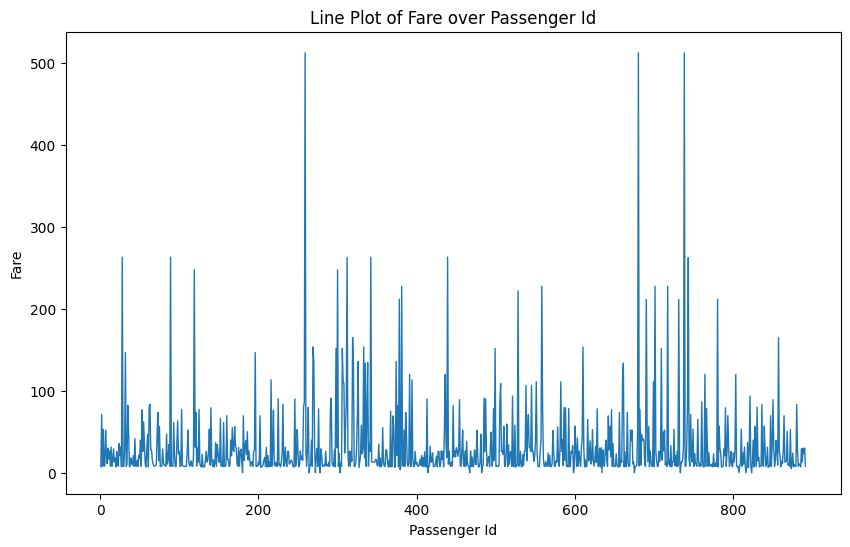

<ipython-input-43-95326c9c2c33>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tic['Age'].dropna(), shade=True, color="b")


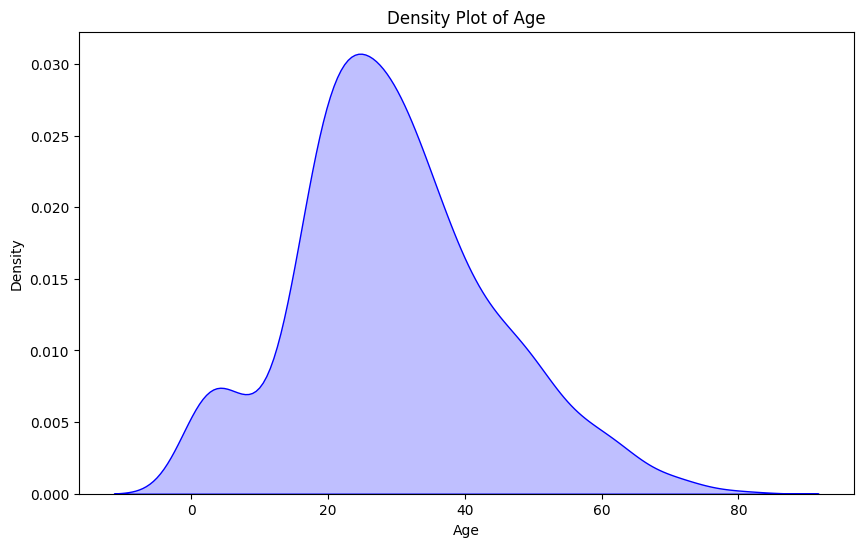

<ipython-input-43-95326c9c2c33>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=tic, palette='summer')


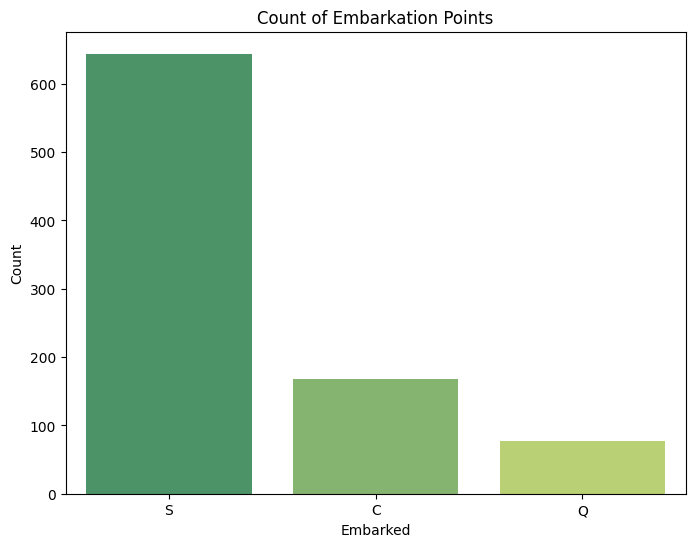

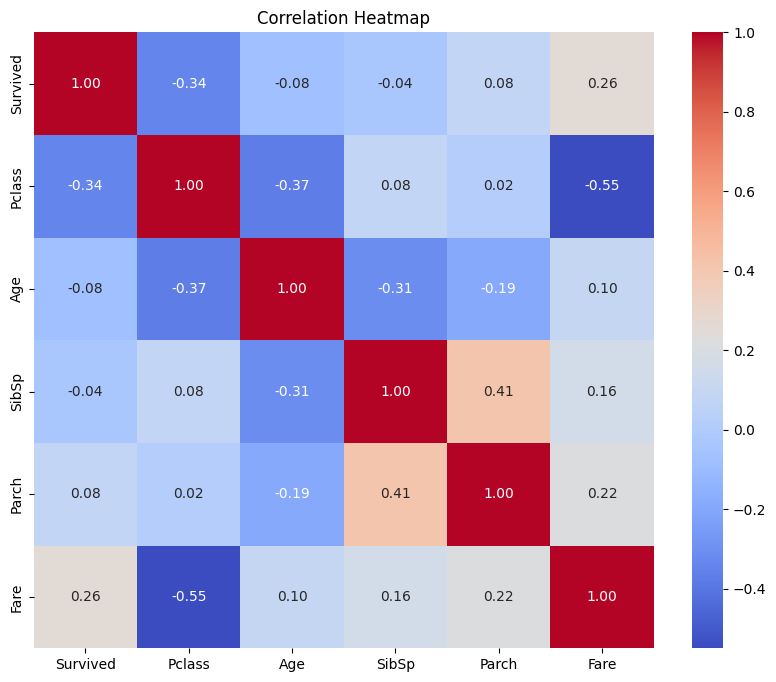

<ipython-input-43-95326c9c2c33>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='Age', data=tic, palette='Set3')


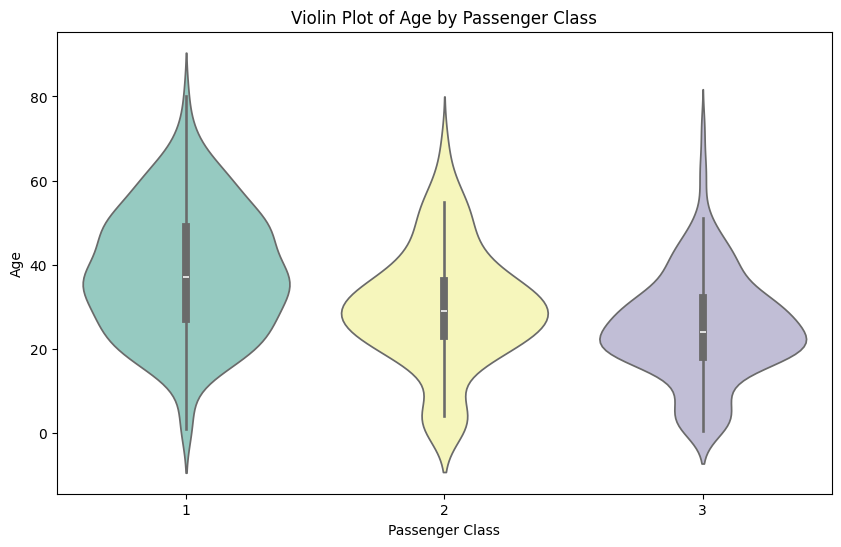

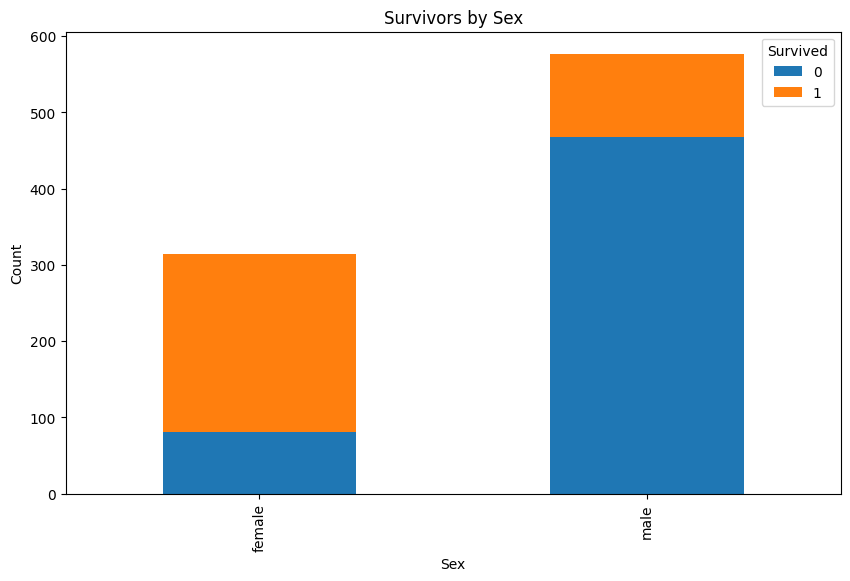

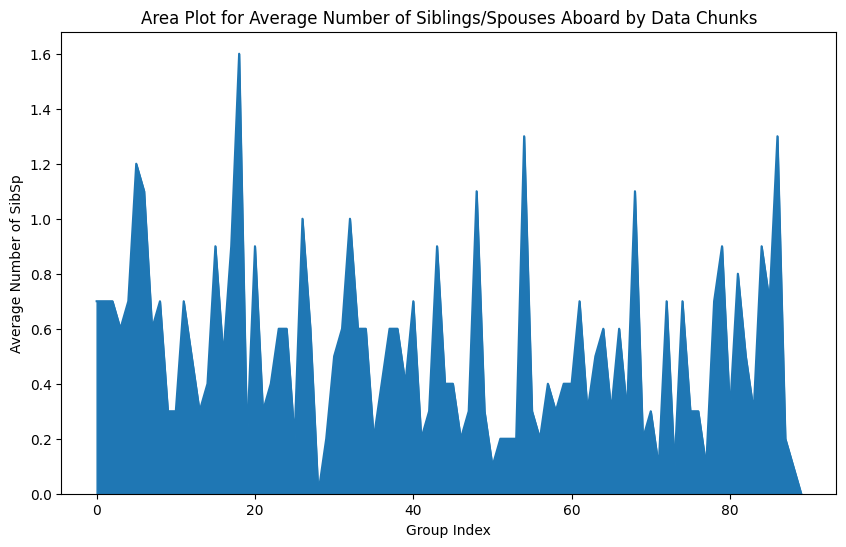

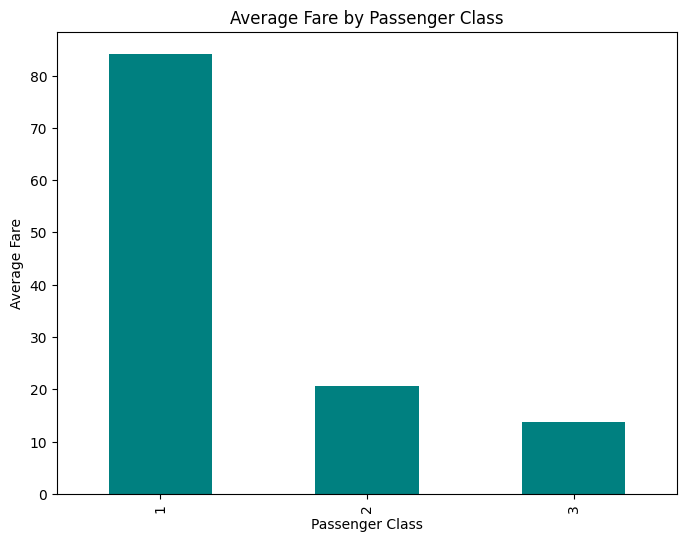

In [43]:
#Line plot of Fare over Passenger Id
plt.figure(figsize=(10, 6))
sns.lineplot(data=tic, x='PassengerId', y='Fare', estimator=None, lw=1)
plt.title('Line Plot of Fare over Passenger Id')
plt.xlabel('Passenger Id')
plt.ylabel('Fare')
plt.show()

#Density plot of Age
plt.figure(figsize=(10, 6))
sns.kdeplot(tic['Age'].dropna(), shade=True, color="b")
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.show()

#Count plot of Embarkation Points
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=tic, palette='summer')
plt.title('Count of Embarkation Points')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

#Heatmap of correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(tic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Violin plot for Age grouped by Pclass
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', data=tic, palette='Set3')
plt.title('Violin Plot of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

#Stacked bar chart of Survivors by Sex
survived_sex = tic.groupby(['Sex', 'Survived']).size().unstack()
survived_sex.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#Area plot for Number of Siblings/Spouses aboard
plt.figure(figsize=(10, 6))
tic.groupby(tic.index // 10)['SibSp'].mean().plot.area()
plt.title('Area Plot for Average Number of Siblings/Spouses Aboard by Data Chunks')
plt.xlabel('Group Index')
plt.ylabel('Average Number of SibSp')
plt.show()

#Bar chart of average Fare by Passenger Class
avg_fare_by_class = tic.groupby('Pclass')['Fare'].mean()
avg_fare_by_class.plot.bar(color='teal', figsize=(8, 6))
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()

In [44]:
# Examine missing values again
tic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
# Set missing values as none
tic = tic.fillna('None')

In [46]:
# Examine missing values again
tic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
# Examine variable type
tic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [57]:
# Change categorical variables to "category"
tic['Name'] = tic['Name'].astype('category')
tic['Sex'] = tic['Sex'].astype('category')
tic['Age'] = tic['Age'].astype('category')
tic['Ticket'] = tic['Ticket'].astype('category')
tic['Cabin'] = tic['Cabin'].astype('category')
tic['Embarked'] = tic['Embarked'].astype('category')

In [49]:
# Examine variable type
tic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age            category
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [58]:
# Create dummy variables
tic = pd.get_dummies(tic, columns=['Name', 'Age', 'Sex', 'Ticket', 'Cabin', 'Embarked'], drop_first=True)
tic

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_None,Cabin_T,Embarked_None,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,2,1,1,1,0,71.2833,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,0,0,7.9250,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,4,1,1,1,0,53.1000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,0,0,8.0500,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
5,6,0,3,0,0,8.4583,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6,7,0,1,0,0,51.8625,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0,3,3,1,21.0750,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
8,9,1,3,0,2,11.1333,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
9,10,1,2,1,0,30.0708,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [59]:
# Partition the data
target = tic['Survived']
predictors = tic.drop(['Survived'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(623, 1814) (268, 1814) (623,) (268,)


In [60]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))

Survived
0    0.611557
1    0.388443
Name: proportion, dtype: float64


In [61]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

Survived
0    0.626866
1    0.373134
Name: proportion, dtype: float64


##Decision Tree

In [107]:
# Build a decision tree model on traning data with max_depth = 5
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

[Text(0.50390625, 0.9166666666666666, 'Sex_male <= 0.5\nentropy = 0.964\nsamples = 623\nvalue = [381, 242]\nclass = No'),
 Text(0.2265625, 0.75, 'Pclass <= 2.5\nentropy = 0.806\nsamples = 215\nvalue = [53, 162]\nclass = Yes'),
 Text(0.125, 0.5833333333333334, 'Ticket_113781 <= 0.5\nentropy = 0.349\nsamples = 122\nvalue = [8, 114]\nclass = Yes'),
 Text(0.09375, 0.4166666666666667, 'Fare <= 28.856\nentropy = 0.286\nsamples = 120\nvalue = [6, 114]\nclass = Yes'),
 Text(0.0625, 0.25, 'Name_Yrois, Miss. Henriette ("Mrs Harbeck") <= 0.5\nentropy = 0.523\nsamples = 51\nvalue = [6, 45]\nclass = Yes'),
 Text(0.03125, 0.08333333333333333, 'entropy = 0.469\nsamples = 50\nvalue = [5, 45]\nclass = Yes'),
 Text(0.09375, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.125, 0.25, 'entropy = 0.0\nsamples = 69\nvalue = [0, 69]\nclass = Yes'),
 Text(0.15625, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.328125, 0.58333333333

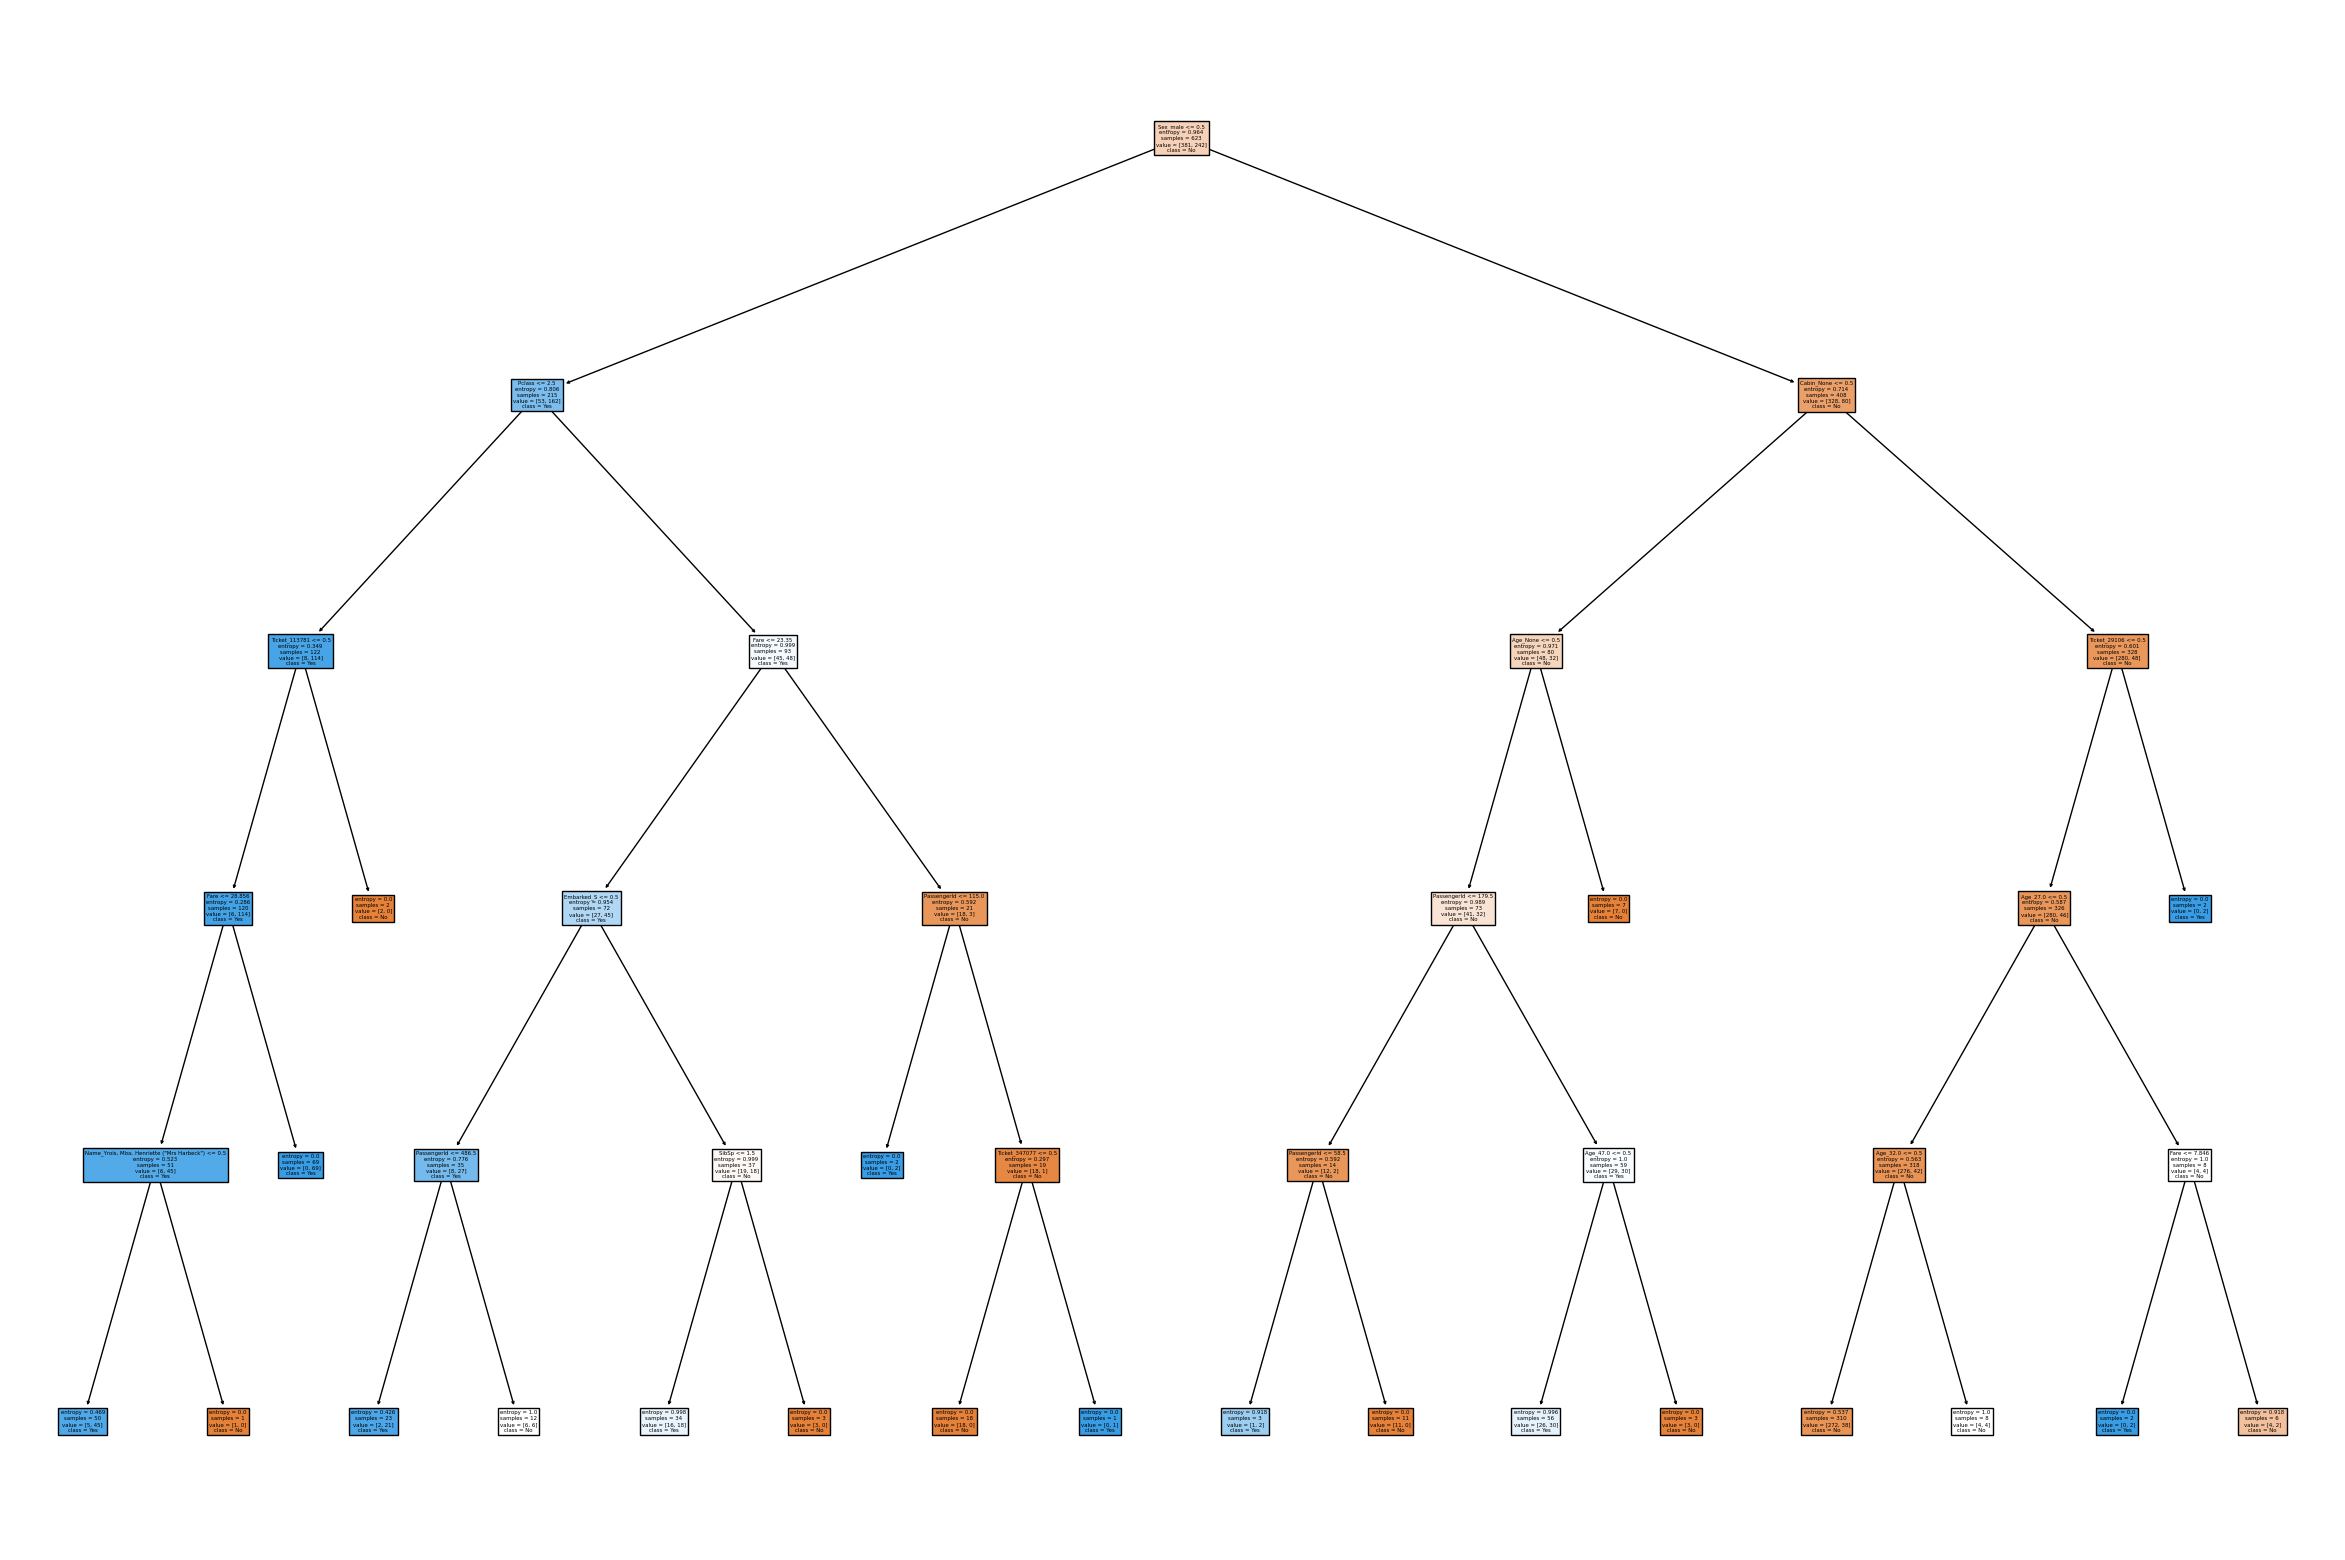

In [108]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [109]:
# Make predictions on testing data
prediction_on_test = model.predict(predictors_test)

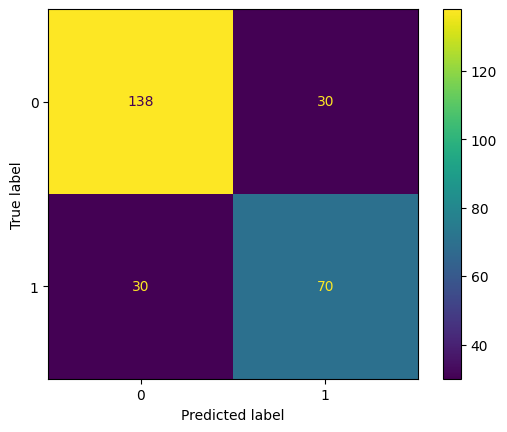

In [110]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

In [111]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.70      0.70      0.70       100

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



##KNN

In [136]:
# Build a K Nearest Neighbor model on traning data with n_neighbors = 20
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(predictors_train, target_train)

KNeighborsClassifier(n_neighbors=20)

In [137]:
# Make predictions on training and testing data
prediction_on_train_KNN = model.predict(predictors_train)
prediction_on_test_KNN = model.predict(predictors_test)

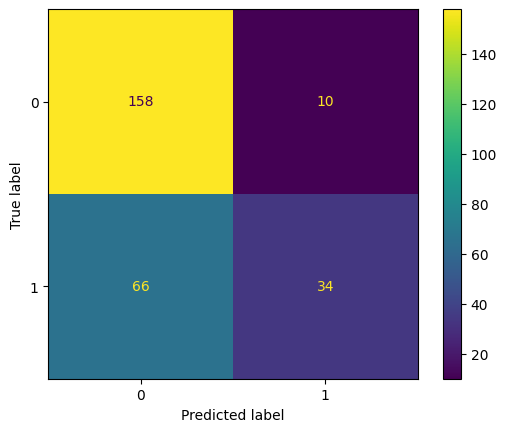

In [139]:
# Examine the evaluation results on training data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [138]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test_KNN))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       168
           1       0.77      0.34      0.47       100

    accuracy                           0.72       268
   macro avg       0.74      0.64      0.64       268
weighted avg       0.73      0.72      0.68       268



##Ensemble Model - 1

In [68]:
# Create three learners
estimators = []
learner_1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
estimators.append(("Decision_Tree", learner_1))
learner_2 = SVC(C=1)
estimators.append(("SVM1", learner_2))
learner_3 = SVC(C=5)
estimators.append(("SVM2", learner_3))
learner_4 = LogisticRegression()
estimators.append(("LR", learner_4))


###Voting

In [69]:
# Create a voting model
model_voting = VotingClassifier(estimators)
model_voting.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Decision_Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=1)),
                             ('SVM1', SVC(C=1)), ('SVM2', SVC(C=5)),
                             ('LR', LogisticRegression())])

In [70]:
# Make predictions on testing data
prediction_on_test = model_voting.predict(predictors_test)

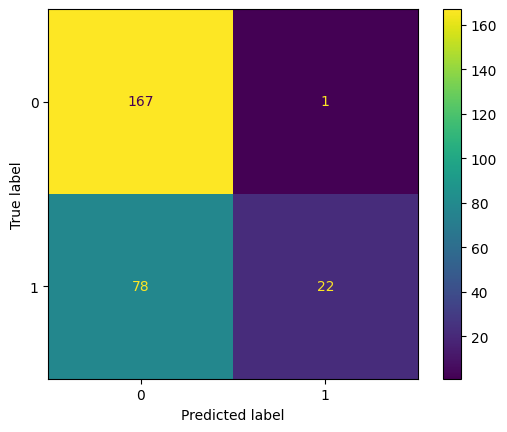

In [71]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

In [72]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       168
           1       0.96      0.22      0.36       100

    accuracy                           0.71       268
   macro avg       0.82      0.61      0.58       268
weighted avg       0.78      0.71      0.64       268



###Bagging

In [73]:
# Bagging based on decision tree model
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3), n_estimators=20, random_state=1)
model_bagging.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3,
                                                        random_state=1),
                  n_estimators=20, random_state=1)

In [74]:
# Make predictions on testing data
prediction_on_test = model_bagging.predict(predictors_test)

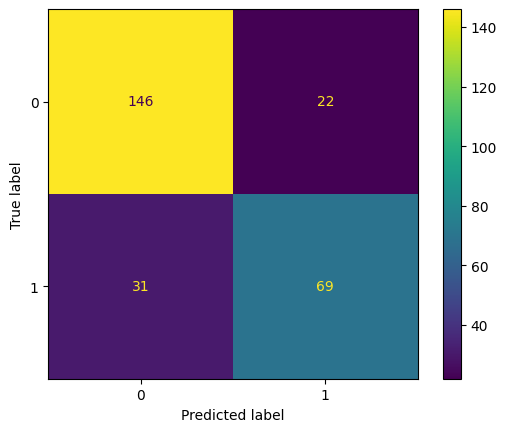

In [75]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

In [76]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       168
           1       0.76      0.69      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



###Boosting

In [77]:
# Bagging based on decision tree model
model_Boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3), n_estimators=10, random_state=1)
model_Boost.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=1),
                   n_estimators=10, random_state=1)

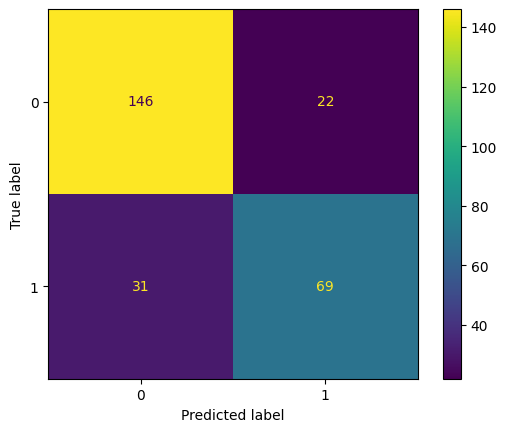

In [78]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

In [79]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       168
           1       0.76      0.69      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



##Ensemble Model - 2

In [80]:
# Create five learners
estimators = []
learner_1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
estimators.append(("Decision_Tree", learner_1))
learner_2 = SVC(C=3)
estimators.append(("SVM1", learner_2))
learner_3 = SVC(C=5)
estimators.append(("SVM2", learner_3))
learner_4 = LogisticRegression()
estimators.append(("LR", learner_4))
learner_5 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=7)
estimators.append(("Decision_Tree_2", learner_5))

###Voting

In [81]:
# Create a voting model
model_voting1 = VotingClassifier(estimators)
model_voting1.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Decision_Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=1)),
                             ('SVM1', SVC(C=3)), ('SVM2', SVC(C=5)),
                             ('LR', LogisticRegression()),
                             ('Decision_Tree_2',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     random_state=1))])

In [82]:
# Make predictions on testing data
prediction_on_test = model_voting1.predict(predictors_test)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       168
           1       0.76      0.70      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



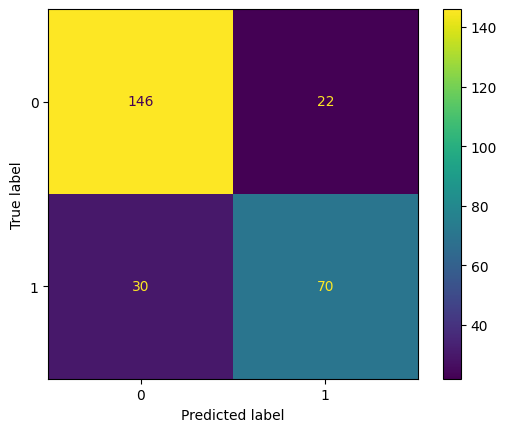

In [83]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

###Bagging

In [84]:
# Bagging based on decision tree model
model_bagging1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3), n_estimators=30, random_state=1)
model_bagging1.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3,
                                                        random_state=1),
                  n_estimators=30, random_state=1)

In [85]:
# Make predictions on testing data
prediction_on_test = model_bagging1.predict(predictors_test)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       168
           1       0.76      0.69      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



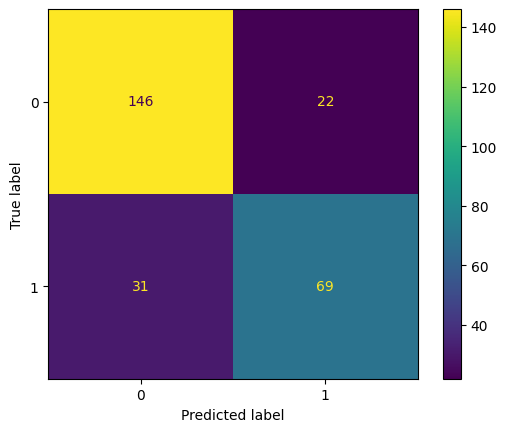

In [86]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

###Boosting

In [87]:
# Boosting based on decision tree model
model_Boost1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3), n_estimators=13, random_state=1)
model_Boost1.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=1),
                   n_estimators=13, random_state=1)

In [88]:
# Make predictions on testing data
prediction_on_test = model_Boost1.predict(predictors_test)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       168
           1       0.80      0.63      0.70       100

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268



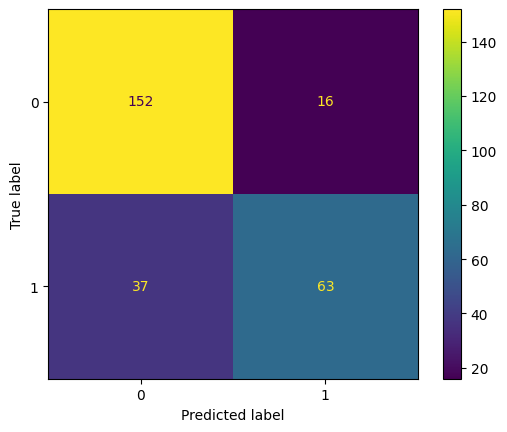

In [89]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

##Comparison with Single Models
Decision Tree Model: This model achieved a 78% accuracy with well-balanced precision, recall, and f1-scores. The decision tree model is particularly valued for its clarity in showing which decisions lead to which outcomes, making it easier to understand the impact of each feature on survival.<br>

K Nearest Neighbor (KNN): The KNN model showed a 72% accuracy, with slightly lower precision, recall, and f1-score than the decision tree. KNN, while effective in many classification problems, depends heavily on the choice of 'k' and the metric used for calculating distances between instances. Its performance suggests it might be slightly less effective in this particular case, possibly due to the complexity and varied scales of the dataset's features.<br>

Compared to these single models, the Bagging ensemble model based on decision trees emerged as particularly robust, achieving an 80% accuracy. This model not only provides high precision and recall but also improves upon the generalization ability of a single decision tree by reducing variance through averaging multiple trees. This makes it more adept at handling overfitting, a common pitfall with single decision tree models.

##Ensemble Model - 3 (Imporving the Accuracy)

In [151]:
estimators = []
learner_1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)
estimators.append(("Decision_Tree", learner_1))
learner_2 = SVC(C=10)
estimators.append(("SVM1", learner_2))
learner_3 = SVC(C=100)
estimators.append(("SVM2", learner_3))
learner_4 = LogisticRegression()
estimators.append(("LR", learner_4))
learner_5 = DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=20)
estimators.append(("Decision_Tree_2", learner_5))
learner_6 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
estimators.append(("Random_Forest", learner_6))
learner_7 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=5, random_state=1)
estimators.append(("Gradient_Boosting", learner_7))
learner_8 = AdaBoostClassifier(n_estimators=100, random_state=1)
estimators.append(("AdaBoost", learner_8))
learner_9 = KNeighborsClassifier(n_neighbors=15)
estimators.append(("KNN", learner_9))

In [153]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy', 'gini']
}

# Creating the base model to tune
dtree = DecisionTreeClassifier(random_state=1)

# Instantiating the grid search model
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(predictors_train, target_train)
best_tree_model = grid_search.best_estimator_

# Now use this best model in your BaggingClassifier
model_bagging2 = BaggingClassifier(base_estimator=best_tree_model, n_estimators=30, random_state=1)
model_bagging2.fit(predictors_train, target_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_samples_leaf=4,
                                                        random_state=1),
                  n_estimators=30, random_state=1)

###Voting

In [154]:
# Create a voting model
model_voting2 = VotingClassifier(estimators)
model_voting2.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Decision_Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     random_state=1)),
                             ('SVM1', SVC(C=10)), ('SVM2', SVC(C=100)),
                             ('LR', LogisticRegression()),
                             ('Decision_Tree_2',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     random_state=1)),
                             ('Random_Forest',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=1)),
                             ('Gradient_Boosting',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=5,
                                                         n_estimators=50,
                                                         random_state=1)),
                             ('AdaBoost',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=1)),
                             ('KNN', KNeighborsClassifier(n_neighbors=15))])

In [155]:
# Make predictions on testing data
prediction_on_test = model_voting2.predict(predictors_test)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       168
           1       0.87      0.58      0.69       100

    accuracy                           0.81       268
   macro avg       0.83      0.76      0.78       268
weighted avg       0.82      0.81      0.80       268



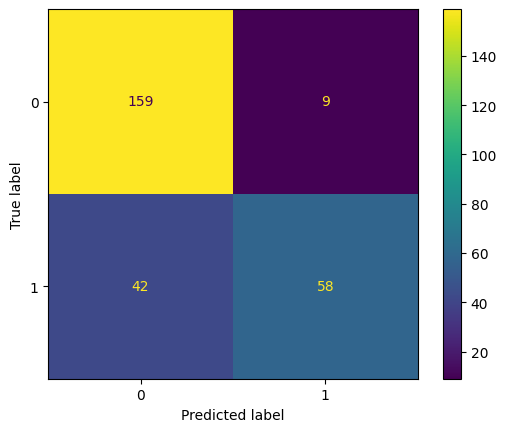

In [156]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

###Bagging

In [157]:
# Bagging based on decision tree model
model_bagging2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3), n_estimators=30, random_state=1)
model_bagging2.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3,
                                                        random_state=1),
                  n_estimators=30, random_state=1)

In [158]:
# Make predictions on testing data
prediction_on_test = model_bagging2.predict(predictors_test)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       168
           1       0.76      0.69      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



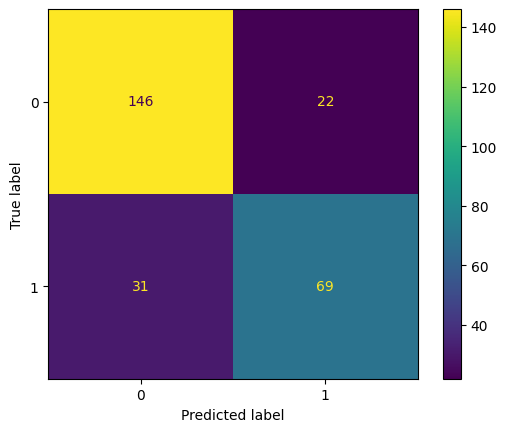

In [159]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

###Boosting

In [160]:
# Boosting based on decision tree model
model_Boost2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3), n_estimators=2, random_state=1)
model_Boost2.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=1),
                   n_estimators=2, random_state=1)

In [161]:
# Make predictions on testing data
prediction_on_test = model_Boost2.predict(predictors_test)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       168
           1       0.72      0.76      0.74       100

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



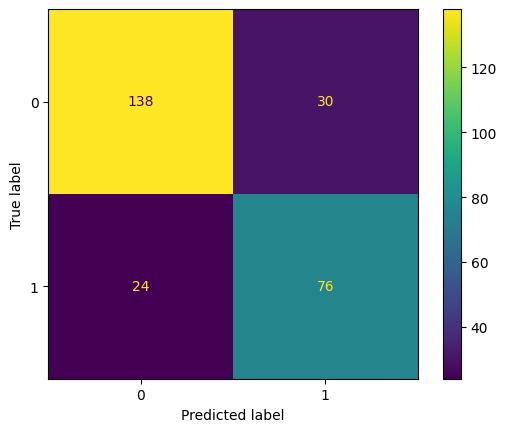

In [162]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()

# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

##Comparisons

When comparing different ensemble methods applied to a classification problem, we observe various performances across techniques such as Voting, Bagging, and Boosting. Each method leverages multiple models to achieve better predictive performance compared to single models by addressing their individual limitations like variance and bias.

Voting Classifier: This ensemble method involves combining different machine learning classifiers and using a majority vote (or the average predicted probabilities) to predict the class labels. In your application, you used a mix of decision trees, SVMs, logistic regression, and additional decision trees with varied depth in different ensemble setups. The Voting classifier's performance varied, with some setups achieving reasonable accuracy, though not always surpassing the bagging or boosting approaches. For instance, in Ensemble Model-2, a voting system incorporating five different models was used, which might have provided a broader range of insights into the data, potentially improving accuracy or other metrics like precision and recall.

Bagging: The Bagging method particularly excelled in your experiments, generally surpassing the accuracy of single models and some other ensemble techniques. By building multiple instances of a model on random subsets of the data and then averaging out their predictions, bagging helps in reducing variance, thereby improving the robustness of the model against overfitting. In your examples, using a Decision Tree as the base estimator consistently showed improvements in model performance metrics like precision, recall, and F1-score, suggesting better generalization on unseen data.

Boosting: Boosting methods, like AdaBoost, also showed significant improvement in predictive accuracy by focusing on instances that previous classifiers misclassified. This method combines multiple weak classifiers sequentially, with each one focusing on the mistakes of its predecessors, to form a strong classifier. Your implementation of AdaBoost using a Decision Tree shows similar performance to the bagging model, indicating its effectiveness in reducing bias while also handling variance.

Overall, ensemble models provide a robust way to improve prediction accuracy by combining the strengths of various underlying models. The specific choice between Voting, Bagging, or Boosting should be guided by the particular characteristics of the data and the problem context, as well as the computational resources available, as ensemble methods can be computationally intensive. In your case, Bagging seems to provide the most consistent improvement across different metrics, making it a particularly suitable choice for scenarios where a balance between bias and variance is critical.

##Dicsussions

Based on the analysis of various ensemble models such as Voting, Bagging, and Boosting applied to the Titanic dataset, certain conclusions can be drawn about the characteristics of individuals who were more likely to survive the sinking of the Titanic. The ensemble methods, particularly Bagging and Boosting, have shown to improve the predictive accuracy and provide a deeper insight into the data, identifying key factors influencing survival.

Passenger Class: The ensemble models, especially those incorporating decision trees, typically highlight the importance of passenger class. Higher-class passengers (First and Second Class) were more likely to survive compared to those in Third Class. This is likely due to better access to lifeboats and emergency resources among higher-class passengers.

Gender and Age: Gender and age played significant roles, with women and children being prioritized during the lifeboat loading process. Ensemble models that include logistic regression and decision trees often capture these categorical variables effectively, underscoring their influence on survival chances.

Fare and Embarked: Fare, which correlates with passenger class, also emerged as a significant factor, where passengers who paid higher fares showing higher survival rates. This could be linked to the socioeconomic status and the cabin location, which might have provided better access to lifeboat decks. Additionally, the port of embarkation influenced survival chances, with some models indicating variations in survival rates among passengers embarked from different ports, possibly due to differences in passenger composition and onboard policies.

Family and Social Factors: Features like the number of siblings/spouses and parents/children aboard also influenced survival probabilities. Having family on board could either increase a passenger's chance of survival due to better mutual support or decrease it if they sought to stay together during the chaos.

The ensemble methods applied to the Titanic dataset provide a comprehensive view by leveraging the strengths of various models to generalize better over different data segments. They confirm that socio-economic factors (like passenger class and fare), demographic factors (such as age and gender), and social factors (like family aboard) were critical in determining the likelihood of survival during the Titanic disaster. These insights can be particularly valuable for historical analysis and learning, providing a nuanced understanding of the tragic event.

In [172]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth4.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth4.ipynb to html
[NbConvertApp] Writing 3408400 bytes to /content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth4.html
